In [1]:
def lire_et_stocker_fichier(nom_fichier):
    try:
        # Initialiser des tableaux vides pour chaque colonne
        client_x = []
        client_y = []
        P = []

        # Ouvrir le fichier en mode lecture
        with open(nom_fichier, 'r') as fichier:
            # Lire chaque ligne du fichier
            for ligne in fichier:
                # Diviser la ligne en éléments en utilisant l'espace comme séparateur
                elements = ligne.strip().split()

                # Stocker chaque élément dans le tableau approprié
                client_x.append(float(elements[0]))
                client_y.append(float(elements[1]))
                P.append(float(elements[2]))

        # Retourner les tableaux
        return client_x, client_y, P

    except FileNotFoundError:
        print(f"Le fichier {nom_fichier} n'a pas été trouvé.")
        return [], [], []
    except Exception as e:
        print(f"Une erreur s'est produite : {e}")
        return [], [], []

# Exemple d'utilisation
nom_fichier_entree = 'instance.txt'

client_x, client_y, P = lire_et_stocker_fichier(nom_fichier_entree)

# Afficher les tableaux
print("Client_x :", client_x)
print("Client_y :", client_y)
print("Profit :", P)


Client_x : [35.0, 15.0, 55.0, 31.0, 60.0, 8.0, 13.0, 6.0, 21.0, 6.0, 47.0, 37.0, 57.0, 36.0, 12.0, 24.0, 62.0, 49.0, 67.0, 57.0, 47.0, 49.0, 49.0, 53.0, 57.0, 15.0, 14.0, 26.0, 18.0, 25.0, 22.0, 25.0, 18.0, 41.0, 35.0, 25.0, 20.0, 10.0, 30.0, 5.0, 45.0, 65.0, 65.0, 64.0, 63.0, 2.0, 20.0, 40.0, 42.0, 24.0, 23.0, 2.0, 49.0, 27.0, 63.0, 53.0, 32.0, 17.0, 27.0, 15.0, 37.0, 37.0, 44.0, 46.0, 61.0, 56.0, 11.0, 26.0, 31.0, 15.0, 22.0, 19.0, 20.0, 37.0]
Client_y : [35.0, 30.0, 5.0, 52.0, 12.0, 56.0, 52.0, 68.0, 24.0, 38.0, 47.0, 31.0, 29.0, 26.0, 24.0, 58.0, 77.0, 73.0, 5.0, 68.0, 16.0, 11.0, 42.0, 43.0, 48.0, 47.0, 37.0, 35.0, 24.0, 24.0, 27.0, 21.0, 18.0, 49.0, 17.0, 30.0, 50.0, 43.0, 5.0, 30.0, 65.0, 35.0, 20.0, 42.0, 65.0, 60.0, 20.0, 25.0, 7.0, 12.0, 3.0, 48.0, 58.0, 43.0, 23.0, 12.0, 12.0, 34.0, 69.0, 77.0, 47.0, 56.0, 17.0, 13.0, 52.0, 37.0, 31.0, 52.0, 67.0, 19.0, 22.0, 21.0, 26.0, 35.0]
Profit : [0.0, 26.0, 29.0, 27.0, 31.0, 27.0, 36.0, 30.0, 28.0, 16.0, 13.0, 14.0, 18.0, 18.0, 13.0, 

# Variables  très importantes du TOP

In [2]:
N=len(P)
n=N#nombre de clients, ici le depart et l'arrivée y sont inclus
m=5#nombre de vehicule dans la flotte
Tmax=50#temps de parcours maximal pour chaque vehicule
R=range(1,n+1)#enumeration de tous les clients(le premier element de la liste:1 correspond au depart et le dernier:n à l'arrivée)
F=range(1,m+1)#Enumeration de tous les vehicules qui seront utilisés
Sp=10#La vitesse à laquelle roule tous les vehicules

In [3]:
N

74

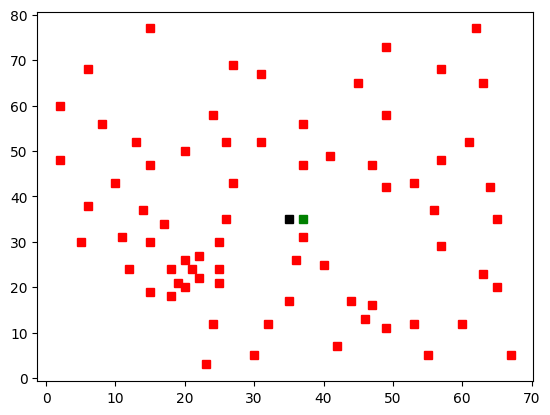

In [4]:
#Affichage des differents clients sur un plan
import numpy as np
import matplotlib.pyplot as plt
plt.plot(client_x[0],client_y[0],c='black',marker='s')#affichage du depart
for k in range(1,n-1):
    plt.plot(client_x[k],client_y[k],c='r',marker='s')#affichage de tous les clients (sans le depart et l'arrivée)

plt.plot(client_x[n-1],client_y[n-1],c='g',marker='s')#affichage de l'arrivée

### A ne pas oublier: le depart et l'arrivée peut être considerés comme des clients avec comme profit 0
### Un client i à pour profit P[i-1]

In [5]:
#les differents clients, depart et arrivee
V_=[i for i in range(2,n)] #Les clients sans les depart et arrivée
V_d=[1]+V_ #les differents clients, plus le depart. 
V_a=V_+[n]#Les differents clients, plus l'arrivée
V=[1]+V_ +[n]#Les differents clients, plus le depart et et l'arrivée 



In [6]:
V_
V_a
V_d
V

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74]

In [7]:
#Formation de tous les arcs possible, avec les sommets correspondants aux clients, le somment 1 correspondant au depart et le sommet n correspondand à l'arrivée 
E=[(i,j) for i in V_d for j in V_a if i!=j ]

In [8]:
E


[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (1, 42),
 (1, 43),
 (1, 44),
 (1, 45),
 (1, 46),
 (1, 47),
 (1, 48),
 (1, 49),
 (1, 50),
 (1, 51),
 (1, 52),
 (1, 53),
 (1, 54),
 (1, 55),
 (1, 56),
 (1, 57),
 (1, 58),
 (1, 59),
 (1, 60),
 (1, 61),
 (1, 62),
 (1, 63),
 (1, 64),
 (1, 65),
 (1, 66),
 (1, 67),
 (1, 68),
 (1, 69),
 (1, 70),
 (1, 71),
 (1, 72),
 (1, 73),
 (1, 74),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 21),
 (2, 22),
 (2, 23),
 (2, 24),
 (2, 25),
 (2, 26),
 (2, 27),
 (2, 28),
 (2, 29),
 (2, 30),
 (2, 

In [9]:
#Les distances entre les differents arcs
D={(i,j):np.hypot(client_x[i-1]-client_x[j-1],client_y[i-1]-client_y[j-1]) for i,j in E}

In [10]:
D[(1,2)]#La distance entre le depart et le client 2


20.615528128088304

In [11]:
D#Affichage de tous les distances


{(1, 2): 20.615528128088304,
 (1, 3): 36.05551275463989,
 (1, 4): 17.46424919657298,
 (1, 5): 33.97057550292606,
 (1, 6): 34.20526275297414,
 (1, 7): 27.80287754891569,
 (1, 8): 43.93176527297759,
 (1, 9): 17.804493814764857,
 (1, 10): 29.154759474226502,
 (1, 11): 16.97056274847714,
 (1, 12): 4.47213595499958,
 (1, 13): 22.80350850198276,
 (1, 14): 9.055385138137417,
 (1, 15): 25.495097567963924,
 (1, 16): 25.495097567963924,
 (1, 17): 49.92995093127971,
 (1, 18): 40.496913462633174,
 (1, 19): 43.86342439892262,
 (1, 20): 39.66106403010388,
 (1, 21): 22.47220505424423,
 (1, 22): 27.784887978899608,
 (1, 23): 15.652475842498529,
 (1, 24): 19.697715603592208,
 (1, 25): 25.553864678361276,
 (1, 26): 23.323807579381203,
 (1, 27): 21.095023109728988,
 (1, 28): 9.0,
 (1, 29): 20.248456731316587,
 (1, 30): 14.866068747318506,
 (1, 31): 15.264337522473747,
 (1, 32): 17.204650534085253,
 (1, 33): 24.041630560342615,
 (1, 34): 15.231546211727817,
 (1, 35): 18.0,
 (1, 36): 11.180339887498949,
 (

In [12]:
T={(i,j):D[(i,j)]/Sp for i,j in E} #Le temps que met un vehicule pour aller d'un client i vers j

In [13]:
T #Affichage de tous les temps de parcours

{(1, 2): 2.0615528128088303,
 (1, 3): 3.605551275463989,
 (1, 4): 1.7464249196572978,
 (1, 5): 3.397057550292606,
 (1, 6): 3.4205262752974144,
 (1, 7): 2.7802877548915688,
 (1, 8): 4.39317652729776,
 (1, 9): 1.7804493814764857,
 (1, 10): 2.9154759474226504,
 (1, 11): 1.6970562748477138,
 (1, 12): 0.447213595499958,
 (1, 13): 2.2803508501982757,
 (1, 14): 0.9055385138137417,
 (1, 15): 2.5495097567963922,
 (1, 16): 2.5495097567963922,
 (1, 17): 4.992995093127972,
 (1, 18): 4.049691346263318,
 (1, 19): 4.386342439892262,
 (1, 20): 3.966106403010388,
 (1, 21): 2.247220505424423,
 (1, 22): 2.7784887978899606,
 (1, 23): 1.5652475842498528,
 (1, 24): 1.9697715603592207,
 (1, 25): 2.5553864678361276,
 (1, 26): 2.3323807579381204,
 (1, 27): 2.109502310972899,
 (1, 28): 0.9,
 (1, 29): 2.024845673131659,
 (1, 30): 1.4866068747318506,
 (1, 31): 1.5264337522473748,
 (1, 32): 1.7204650534085253,
 (1, 33): 2.4041630560342613,
 (1, 34): 1.5231546211727818,
 (1, 35): 1.8,
 (1, 36): 1.118033988749895,
 

In [14]:
T[(1,2)]#Le temps de parcours d'un vehicule pour aller du depart au client 2


2.0615528128088303

In [15]:
#Ici on determine le maximum des temps que met un vehicule pour quitter d'un client et aller à l'arrivée

import numpy as np

valeurs_temps = []

for i in V_d:
    valeurs_temps.append((T[(i, n)]))
print(valeurs_temps)
print("")
# Le maximum des temps
max_T = np.max(valeurs_temps)

print("le maximum des temps que met un vehicule pour quitter d'un client et aller à l'arrivée est",max_T)
#max_T sera utilisé plutard

[0.2, 2.2561028345356955, 3.49857113690718, 1.8027756377319946, 3.2526911934581184, 3.5805027579936315, 2.9410882339705484, 4.527692569068709, 1.94164878389476, 3.1144823004794873, 1.5620499351813308, 0.4, 2.08806130178211, 0.9055385138137417, 2.7313000567495327, 2.6419689627245813, 4.887739763939974, 3.984971769034255, 4.242640687119286, 3.858756276314948, 2.1470910553583886, 2.6832815729997477, 1.3892443989449803, 1.788854381999832, 2.3853720883753127, 2.5059928172283334, 2.3086792761230392, 1.1, 2.195449840010015, 1.6278820596099706, 1.7, 1.8439088914585775, 2.5495097567963922, 1.4560219778561037, 1.8110770276274835, 1.3, 2.2671568097509267, 2.8160255680657444, 3.0805843601498726, 3.2388269481403293, 3.104834939252005, 2.8, 3.176476034853718, 2.7892651361962706, 3.9698866482558417, 4.301162633521313, 2.2671568097509267, 1.044030650891055, 2.8442925306655784, 2.6419689627245813, 3.4928498393145957, 3.733630940518894, 2.5942243542145693, 1.2806248474865698, 2.8635642126552705, 2.80178

## Nous utiliserons l'heuristique de Clark & Wright pour pouvoir resoudre notre PVC et TOP

In [16]:
#Creation des maguerites avec les profits de parcours de chaque marguerite
def Listes_marguerites(P,n):
#Avec comme argument la listes des profits et le nombre de clients
    S=[]
    for i in V_:
        economie = P[0] + P[i - 1] + P[n - 1]#avec les differentes instances trouvées le departet l'arrivée n'ont pas de profit( donc P[0]=P[n-1]=0) #Cette economie est adequate lorsque les clients, et surtout ceux aux grands profits ne sont pas eloignés du depart et à l'arrivée
        #economie = P[0] + P[i - 1] + P[n - 1]/ D[(1,i)]+D[(i,n)] #On aurait prendre comme economie:profit(client)/ (distance(depart, client)+distance(client,arrivée)). Cette economie est adequate lorsque les clients, et surtout ceux aux grands profits sont très eloignés du depart et à l'arrivée
        M=[1,i,n,economie]#c'est le 4e element de la liste qui correspond au profit que fait un vehicule en quittant du depart allant chez un client et enfin allant à la destination
        S.append(M)
    return S
Listes_marguerites(P,n)



[[1, 2, 74, 26.0],
 [1, 3, 74, 29.0],
 [1, 4, 74, 27.0],
 [1, 5, 74, 31.0],
 [1, 6, 74, 27.0],
 [1, 7, 74, 36.0],
 [1, 8, 74, 30.0],
 [1, 9, 74, 28.0],
 [1, 10, 74, 16.0],
 [1, 11, 74, 13.0],
 [1, 12, 74, 14.0],
 [1, 13, 74, 18.0],
 [1, 14, 74, 18.0],
 [1, 15, 74, 13.0],
 [1, 16, 74, 19.0],
 [1, 17, 74, 20.0],
 [1, 18, 74, 25.0],
 [1, 19, 74, 25.0],
 [1, 20, 74, 15.0],
 [1, 21, 74, 25.0],
 [1, 22, 74, 18.0],
 [1, 23, 74, 13.0],
 [1, 24, 74, 14.0],
 [1, 25, 74, 23.0],
 [1, 26, 74, 16.0],
 [1, 27, 74, 11.0],
 [1, 28, 74, 15.0],
 [1, 29, 74, 22.0],
 [1, 30, 74, 20.0],
 [1, 31, 74, 11.0],
 [1, 32, 74, 12.0],
 [1, 33, 74, 17.0],
 [1, 34, 74, 10.0],
 [1, 35, 74, 7.0],
 [1, 36, 74, 3.0],
 [1, 37, 74, 5.0],
 [1, 38, 74, 9.0],
 [1, 39, 74, 8.0],
 [1, 40, 74, 2.0],
 [1, 41, 74, 9.0],
 [1, 42, 74, 3.0],
 [1, 43, 74, 6.0],
 [1, 44, 74, 9.0],
 [1, 45, 74, 8.0],
 [1, 46, 74, 5.0],
 [1, 47, 74, 8.0],
 [1, 48, 74, 9.0],
 [1, 49, 74, 5.0],
 [1, 50, 74, 5.0],
 [1, 51, 74, 7.0],
 [1, 52, 74, 1.0],
 [1, 5

In [17]:
#La somme de tous les profits 
def profit_max_possibles (P,n):
    profit=0
    for i in range(n):
        profit =profit+P[i]
    return profit
        
profit_max_possibles(P,n)        

900.0

In [18]:
def Tri_margs():
    #Le but de cette fonction est le tri des marguerites du graphe suivant les profits(ils representont les economies en adaptation de Clark&Wright) decroissants
    
    listes_marg = Listes_marguerites(P,n)# On fait appel à cette fonction pour pouvoir avoir la liste des marguerites

    # On trie la la liste des marguerites en fonction du quatrième élément de chaque sous-liste
    liste_triee = sorted(listes_marg, key=lambda x: x[3], reverse=True)

    # On sélectionne les trois premiers éléments de chaque sous-liste dans la liste triée(le depart, le client, l'arrivée)
    resultat = [sub_liste[:3] for sub_liste in liste_triee]

    # Afficher le résultat
    return resultat
Tri_margs()

[[1, 7, 74],
 [1, 5, 74],
 [1, 8, 74],
 [1, 3, 74],
 [1, 9, 74],
 [1, 4, 74],
 [1, 6, 74],
 [1, 2, 74],
 [1, 18, 74],
 [1, 19, 74],
 [1, 21, 74],
 [1, 25, 74],
 [1, 29, 74],
 [1, 17, 74],
 [1, 30, 74],
 [1, 16, 74],
 [1, 13, 74],
 [1, 14, 74],
 [1, 22, 74],
 [1, 33, 74],
 [1, 10, 74],
 [1, 26, 74],
 [1, 20, 74],
 [1, 28, 74],
 [1, 12, 74],
 [1, 24, 74],
 [1, 11, 74],
 [1, 15, 74],
 [1, 23, 74],
 [1, 32, 74],
 [1, 27, 74],
 [1, 31, 74],
 [1, 34, 74],
 [1, 53, 74],
 [1, 59, 74],
 [1, 72, 74],
 [1, 38, 74],
 [1, 41, 74],
 [1, 44, 74],
 [1, 48, 74],
 [1, 54, 74],
 [1, 60, 74],
 [1, 63, 74],
 [1, 68, 74],
 [1, 73, 74],
 [1, 39, 74],
 [1, 45, 74],
 [1, 47, 74],
 [1, 64, 74],
 [1, 35, 74],
 [1, 51, 74],
 [1, 57, 74],
 [1, 67, 74],
 [1, 43, 74],
 [1, 56, 74],
 [1, 61, 74],
 [1, 66, 74],
 [1, 37, 74],
 [1, 46, 74],
 [1, 49, 74],
 [1, 50, 74],
 [1, 62, 74],
 [1, 36, 74],
 [1, 42, 74],
 [1, 58, 74],
 [1, 65, 74],
 [1, 69, 74],
 [1, 40, 74],
 [1, 55, 74],
 [1, 71, 74],
 [1, 52, 74],
 [1, 70, 74]]

In [19]:
print(len(Tri_margs()))

72


In [20]:
def Tri_clients():
    #Tri des clients par economies~profits importants( de maniere croissante), le depart et l'arrivée ne sont pas comptés ici
    Trie_clients=[]
    for i in range(len(Tri_margs())):
        Trie_clients.append(Tri_margs()[i][1])#On recupere la 2e colonne de la liste de listes qu'est Liste_marguerites
    return Trie_clients
        
        
        

In [21]:
Tri_clients()

[7,
 5,
 8,
 3,
 9,
 4,
 6,
 2,
 18,
 19,
 21,
 25,
 29,
 17,
 30,
 16,
 13,
 14,
 22,
 33,
 10,
 26,
 20,
 28,
 12,
 24,
 11,
 15,
 23,
 32,
 27,
 31,
 34,
 53,
 59,
 72,
 38,
 41,
 44,
 48,
 54,
 60,
 63,
 68,
 73,
 39,
 45,
 47,
 64,
 35,
 51,
 57,
 67,
 43,
 56,
 61,
 66,
 37,
 46,
 49,
 50,
 62,
 36,
 42,
 58,
 65,
 69,
 40,
 55,
 71,
 52,
 70]

In [22]:
len(Tri_clients()
   )

72

## L'algorithme principal

In [23]:

H = Tri_clients()#On reccupere la liste des clients triés par profits importants et decroissants
#H = []
#for i in range(len(tri_clients_result)):
    #H.append(tri_clients_result[i])

print(H)
print("")
Prf=0 #le profit à l'instant 0
Sol = [1]
for m in F:
    K = []
    i = 0
    temps = T[(1, H[i])]
    while i < len(H)-1 :  
        if temps + T[(H[i], n)]+max_T <= Tmax:#On ajoute max_T car il faudrait que pour qu'il y ait fusion ou du moins ajout d'un client i+1  dans la solution, il faut que le temps de parcours du depart au client i, plus le temps de parcours du client i vers i+1, plus le temps de parcours du client (le plus eloigné de l'arrivée) à l'arrivée soit inferieur à Tmax 
            Sol.append(H[i])#fusion ou du moins ajout du client i à la solution
            temps = temps + T[(H[i], H[i + 1])]  # temps de parcours entre le depart et le i-ème client plus le temps de parcours entre le i-ème client et le i+1 ème client 
            #H.remove(H[i])
            Prf=Prf+P[H[i]-1]#ajout du profit  apres  avoir parcouru le client i
            print("Le profit apres avoir visité le client",H[i],"est",Prf)
            i = i + 1
        else:
            K.append(H[i])
            print("Le client", H[i], "ne peut pas être visité par le vehicule",m)
            #H.remove(H[i])
            i = i + 1
    Sol.append(n)
    print("")
    print("La solution", m, " pour le  vehicule", m, " est", Sol)
    print("")
    print("les clients que vont potentiellement visiter les autres vehicules sont:", K)
    Sol=[1]
    H = K
    #si je mets les remove de ci dessus alors pas besoin d'affecter K à H
    print("")
print("Le profit total recueilli par tous les vehicules est",Prf, "sur",profit_max_possibles(P,n),"possibles")

[7, 5, 8, 3, 9, 4, 6, 2, 18, 19, 21, 25, 29, 17, 30, 16, 13, 14, 22, 33, 10, 26, 20, 28, 12, 24, 11, 15, 23, 32, 27, 31, 34, 53, 59, 72, 38, 41, 44, 48, 54, 60, 63, 68, 73, 39, 45, 47, 64, 35, 51, 57, 67, 43, 56, 61, 66, 37, 46, 49, 50, 62, 36, 42, 58, 65, 69, 40, 55, 71, 52, 70]

Le profit apres avoir visité le client 7 est 36.0
Le profit apres avoir visité le client 5 est 67.0
Le profit apres avoir visité le client 8 est 97.0
Le profit apres avoir visité le client 3 est 126.0
Le profit apres avoir visité le client 9 est 154.0
Le profit apres avoir visité le client 4 est 181.0
Le profit apres avoir visité le client 6 est 208.0
Le profit apres avoir visité le client 2 est 234.0
Le client 18 ne peut pas être visité par le vehicule 1
Le client 19 ne peut pas être visité par le vehicule 1
Le profit apres avoir visité le client 21 est 259.0
Le client 25 ne peut pas être visité par le vehicule 1
Le client 29 ne peut pas être visité par le vehicule 1
Le client 17 ne peut pas être visité par 